# Exploatory Analysis of Trending YouTube Videos in the US

In this project, we will discover what categories affect the viewership of the most trending YouTube videos in the US. What we can gain from analyzing these categories would be that we can improve recommending different types of videos to other people based on the majority opinion of what genres of videos are perceived as worthwhile to watch.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Storing the csv files of the trending youtube videos from the US as a variable
USvideos_data = pd.read_csv("USvideos.csv")
USvideos_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [3]:
Videos_In_US = USvideos_data.drop_duplicates(subset = "title", keep = "first")

In [4]:
#Organizing the most trending US Videos by views
Videos_In_US.sort_values(by = "views", ascending = False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
23824,#NAME?,18.15.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
30750,u9Mv98Gr5pY,18.25.04,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03.000Z,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",27973210,850362,26541,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...
4600,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
28624,U9BwWKXjVaI,18.14.04,Drake - Nice For What,DrakeVEVO,10,2018-04-07T02:46:31.000Z,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",24421448,641546,16517,42949,https://i.ytimg.com/vi/U9BwWKXjVaI/default.jpg,False,False,False,Music video by Drake performing Nice For What....
38161,1J76wN0TPI4,18.01.06,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30T07:51:32.000Z,"Sanju|""Official Trailer""|""sanju official trail...",23758250,587326,18799,43728,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...


We are now going to analyze the top 10 most viewed YouTube Videos in the US and we're going to see what common group(s) of generes have put these videos in a very high percentile in terms of viewership.

In [5]:
#Top 10 Most Watched Videos from the 2017-2018 Period
Videos_In_US_Top_10 = Videos_In_US.nlargest(10, "views")

In [6]:
Videos_In_US_Top_10.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
23824,#NAME?,18.15.03,Maluma - El Préstamo (Official Video),MalumaVEVO,10,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...
35550,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
28605,i0p1bmr0EmE,18.14.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...
3200,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
70,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


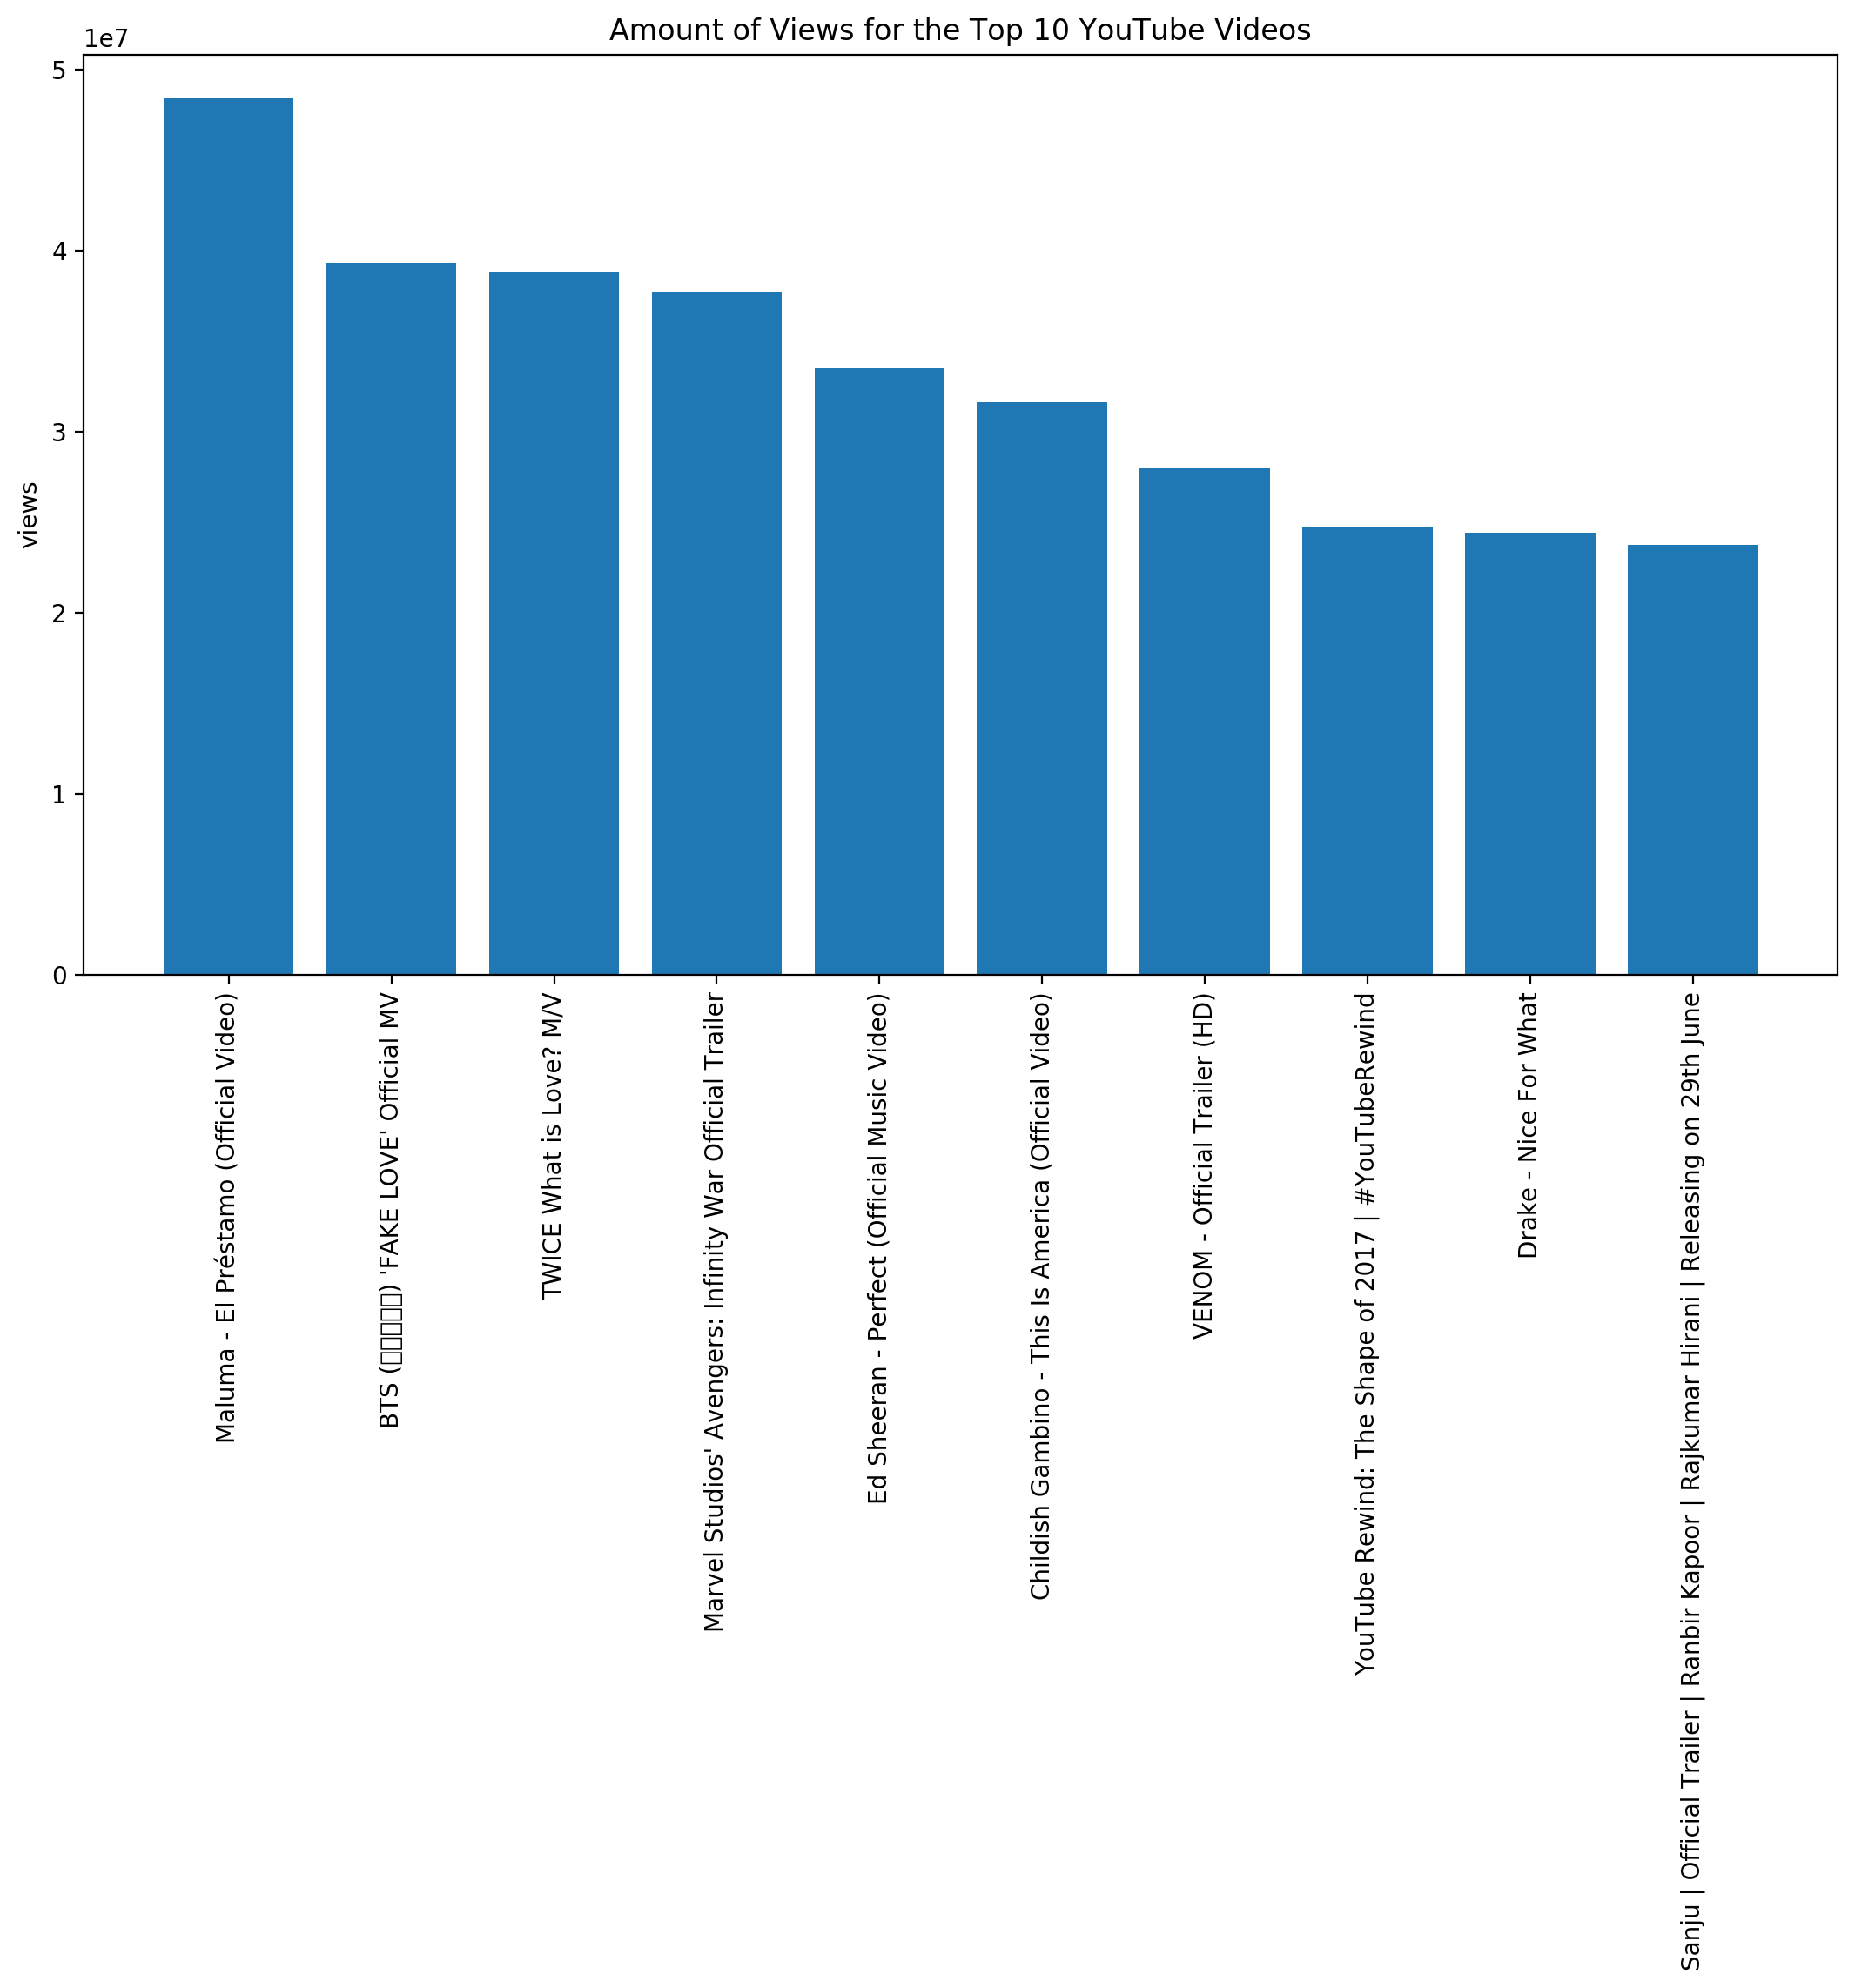

In [12]:
#Plot of the Number of Views from the Top 10 Most Watched Videos from the 2017-2018 Period
plt.figure(figsize=(13, 7), dpi=200)
plt.bar(Videos_In_US_Top_10["title"],Videos_In_US_Top_10["views"])
plt.xticks(rotation=90)
plt.ylabel("views")
plt.title("Amount of Views for the Top 10 YouTube Videos")
plt.show()


From the bar graph from above, we can see that the top 10 most viewed videos in the US tend to be in the genres of music videos and superhero films (for example, "Marvel Studios' Avengers: Infinity War Official Trailer" and "VENOM - Official Trailer(HD)"). The only videos that seem to be the exception of the rule in this trend would be "YouTube Rewind: The Shape of 2017|#YouTubeRewind" and "Sanju|Official|Trailer|Ranbir Kapoor|Rajkumar Hirani|Releasing on 29th June" since Youtube's 2017 Rewind is simply a compulation of popular YouTube channels/videos from that year and the Sanju film is a biographical film about the actor Sanjay Dutt. 

c:\users\ugoch\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


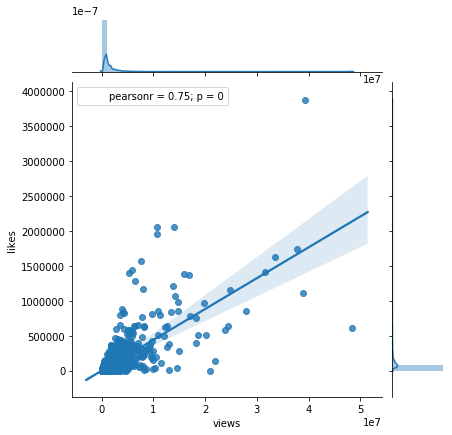

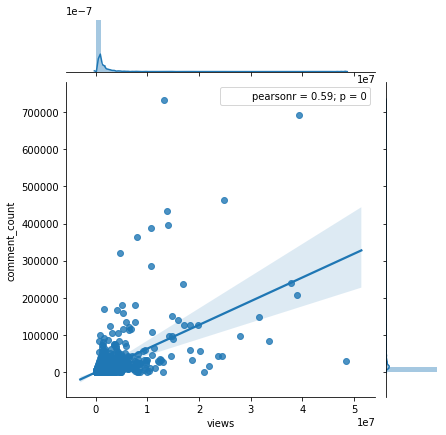

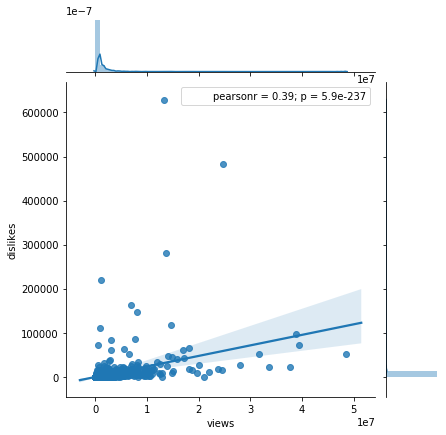

<Figure size 3200x1800 with 0 Axes>

In [9]:
#Observing the differences of the number of likes, dislikes, and comments of trending videos in the US
number_of_likes = sns.jointplot(x = "views", y = "likes", data = Videos_In_US, kind = "reg")
number_of_likes.annotate(stats.pearsonr)
number_of_comments = sns.jointplot(x = "views", y = "comment_count", data = Videos_In_US, kind = "reg")
number_of_comments.annotate(stats.pearsonr)
number_of_dislikes = sns.jointplot(x = "views", y = "dislikes", data = Videos_In_US, kind = "reg")
number_of_dislikes.annotate(stats.pearsonr)
plt.figure(figsize = (16, 9), dpi = 200)
plt.show()

For the three graphs, we can see that the one thing that they have in common is that they all have fairly weak positive linear relatioships since a fair amount of points tend to be scattered away from the line of best fit, but a large portion of the points are very close to the line of best fit. However, the differences that I have seen in each graph would be that the graph that focuses on the number of likes in each trending video shows a trend in which as the videos increase in the amount of views that they have, there's an increase in the amount of likes that it will have (we really start to see this consistent level of growth around 5,000,000 views, reaches it's peak at 40,000,000 views with 4,000,000 likes, and then declines right after that); the graph with the number of comments has a similar style of growth as the graph with the number of likes, but the difference between the two is that the graph with the number of comments has a much larger dispersion of data points from the best line of fit at around 2,000,000 views and reaches it's max comment count at 15,000,000 views with around 720,000 comments; the graph with the number of dislikes is the most different out of the three graphs in which it reaches it's maximum peak on its perspective y axis very early at 15,000,000 views with 600,000 dislikes and after that point, there's a consistent increase in dislikes as the views increase, but the majority of those dislikes are under 100,000 dislikes. Based on these observations, we can safely conclude that as the more popular a video gets in viewership, the more likes and commentary that the video will receive; and as the least popular a video gets in viewership, the more dislikes that the video will receive.